📈 Objetivo do Projeto
Você deve investigar os fatores que influenciam o total de vendas (vendas) e responder à seguinte pergunta:

“Quais variáveis estão mais associadas com o desempenho de vendas mensal das lojas?”

✅ Tarefas Esperadas
Análise Exploratória dos Dados (EDA):

- Histograma ou boxplot das variáveis numéricas.

- Gráfico de linha da variação das vendas ao longo dos meses.

- Comparações entre regiões (ex: vendas médias por região com seaborn.barplot).

- Correlação entre as variáveis (heatmap).

🔍 Visualizações com plotly express:

- Gráfico de dispersão entre clientes e vendas, com cores por região (use px.scatter).

- Linha de tendência com trendline='ols' para visualização de regressão.

✔ Modelo de Regressão Linear com statsmodels:

- Faça a regressão de vendas como variável dependente.

- Inclua como variáveis independentes: clientes, descontos, campanha_marketing, preco_medio_produto, indice_satisfacao, regiao (usar dummies)

Interprete os coeficientes e valores-p.

Analise os resíduos.

Conclusão:

- Quais variáveis são estatisticamente significantes?

- Como a empresa pode usar essas informações para aumentar suas vendas?

📌 Exemplo de Gráficos Esperados

- histograma: distribuição das vendas

- boxplot: comparação das vendas por região

- scatterplot: vendas vs. clientes com cores por região

- lineplot: tendência de vendas ao longo dos meses

-  heatmap: correlação entre variáveis numéricas

In [4]:
# Libraries for Extract, Treat and Load
import numpy as np, pandas as pd

# Libraries for Data Visualization
import matplotlib.pyplot as plt, seaborn as sns, plotly.express as px

# Libraries for Data Sciente
import statsmodels.api as sm

In [5]:
# Ignorando lertas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
# Importando Dados
FactSales = pd.read_parquet('Sales.parquet')

# Lendo o cabeçalho da base de dados
FactSales.head()

,IdLoja,MesAnoVenda,Regiao,Clientes,DescontoPercent,CampanhaMarketing,PrecoMedio,IndiceSatisfacao,Vendas
0,1,2024-01,Sudeste,1475,5.0,1,113.71,8.23,160.85
1,1,2024-02,Sudeste,689,12.0,0,192.27,7.07,108.34
2,1,2024-03,Sudeste,1457,23.0,0,168.23,6.77,175.96
3,1,2024-04,Sudeste,1186,14.0,0,106.73,9.28,98.76
4,1,2024-05,Sudeste,1457,30.0,0,96.89,7.48,91.43


In [7]:
# Verificando se há Valores Nulos

print(FactSales.isnull().sum(), FactSales.isna().sum(), sep='\n-----------------------\n')

IdLoja               0
MesAnoVenda          0
Regiao               0
Clientes             0
DescontoPercent      0
CampanhaMarketing    0
PrecoMedio           0
IndiceSatisfacao     0
Vendas               0
dtype: int64
-----------------------
IdLoja               0
MesAnoVenda          0
Regiao               0
Clientes             0
DescontoPercent      0
CampanhaMarketing    0
PrecoMedio           0
IndiceSatisfacao     0
Vendas               0
dtype: int64


In [8]:
# Resumo Informativo da Tabela

FactSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IdLoja             720 non-null    int64  
 1   MesAnoVenda        720 non-null    object 
 2   Regiao             720 non-null    object 
 3   Clientes           720 non-null    int32  
 4   DescontoPercent    720 non-null    float64
 5   CampanhaMarketing  720 non-null    int32  
 6   PrecoMedio         720 non-null    float64
 7   IndiceSatisfacao   720 non-null    float64
 8   Vendas             720 non-null    float64
dtypes: float64(4), int32(2), int64(1), object(2)
memory usage: 45.1+ KB


In [9]:
# Setando Paleta de Cores

from cycler import cycler

cores = plt.get_cmap('Pastel1').colors

plt.rc('axes', prop_cycle=cycler('color', cores))


In [10]:
# Análise de Variáveis - Parte 1

dados_part1 = FactSales[['Clientes', 'PrecoMedio', 'Vendas']].melt(var_name='Variavel', value_name='Valor')

map_labels = {
        'Clientes': 'Clientes',
       'PrecoMedio': 'Preço Médio',
       'Vendas': 'Vendas'
    }

dados_part1['Variavel'] = dados_part1['Variavel'].map(map_labels)

colors = px.colors.qualitative.Antique

fig = px.box(
       data_frame=dados_part1,
       x='Variavel',
       y='Valor',
       color='Variavel',
       title='Análise Estatística Descritiva das Variáveis - Parte 2',
       color_discrete_sequence=colors,
       labels={
        'Variavel': 'Indicador',
        'Valor': 'Valor Observado'
       },
       height=400, 
       width=1300
       )

fig.update_layout(
       yaxis_title=None,
       xaxis_title='Variáveis', 
       title_x=0.5,
       title_font_size=20,
       font_size=14,
       title_font_color='midnightblue',
       font_family='Tahoma, monospace',
       font_color='black'
)

fig.show()

In [11]:
# Análise de Variáveis - Parte 2

dados_part2 = FactSales[['DescontoPercent','CampanhaMarketing', 'IndiceSatisfacao']].melt(var_name='Variavel', value_name='Valor')

map_labels = {
       'DescontoPercent': 'Desconto Produto',
        'CampanhaMarketing': 'Campanha de Marketing',
        'IndiceSatisfacao': 'Índice de Satisfação'
    }

dados_part2['Variavel'] = dados_part2['Variavel'].map(map_labels)

fig = px.box(
       data_frame=dados_part2,
       x='Variavel',
       y='Valor',
       color='Variavel',
       title='Análise Estatística Descritiva das Variáveis - Parte 2',
       color_discrete_sequence=colors,
       labels={
        'Variavel': 'Indicador',
        'Valor': 'Valor Observado'
       },
       height=400, 
       width=1300
       )

fig.update_layout(
       yaxis_title=None,
       xaxis_title='Variáveis', 
       title_x=0.5,
       title_font_size=20,
       font_size=14,
       title_font_color='midnightblue',
       font_family='Tahoma, monospace',
       font_color='black'
)

fig.show()

C:\Users\adrya\AppData\Local\Temp\ipykernel_20048\2550206341.py:64: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



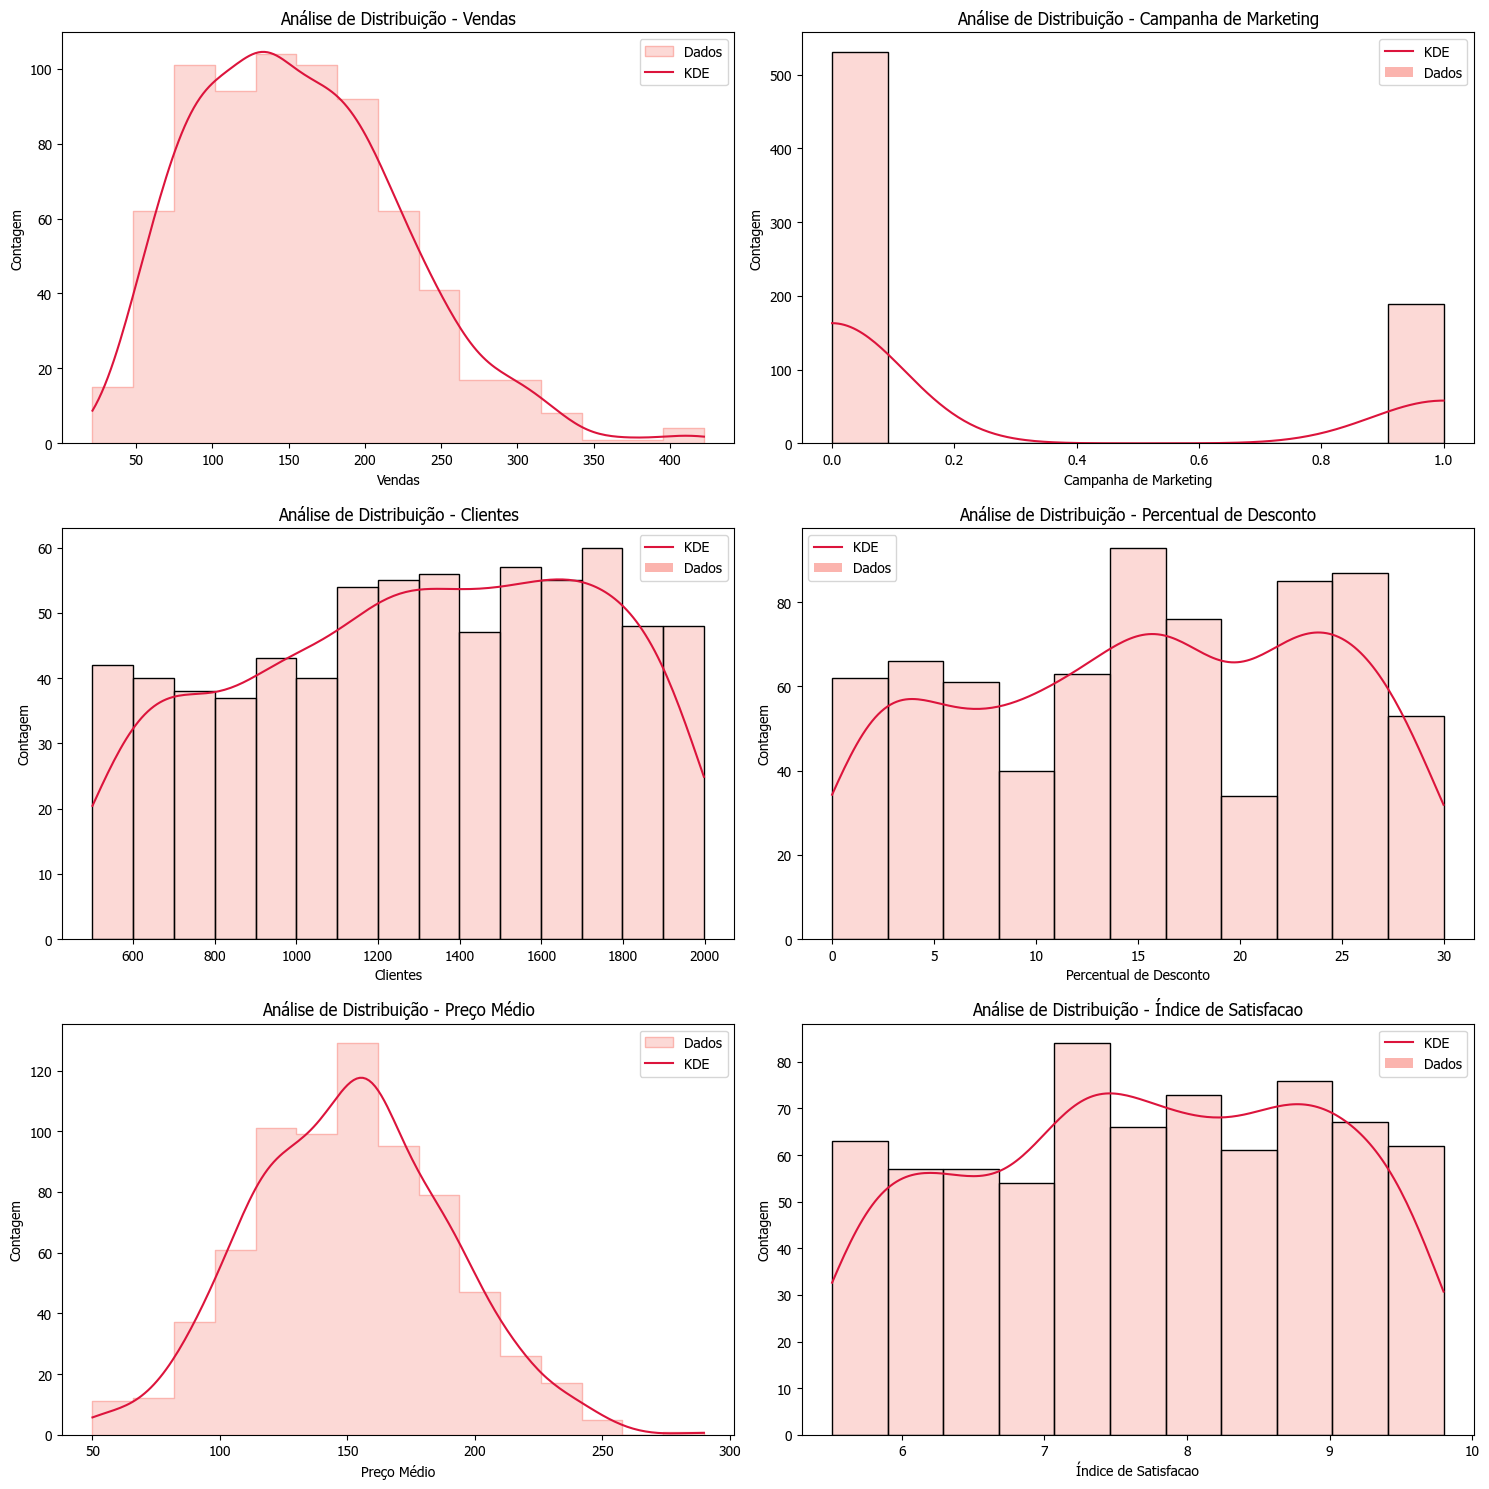

In [12]:
# Análise de Distribuição dos Dados

from plotly.subplots import make_subplots

dados = FactSales[['Clientes', 'DescontoPercent','CampanhaMarketing', 'PrecoMedio', 'IndiceSatisfacao', 'Vendas']]

map_col = {'Clientes': 'Clientes',
           'DescontoPercent': 'Percentual de Desconto',
           'CampanhaMarketing': 'Campanha de Marketing',
           'PrecoMedio': 'Preço Médio',
           'IndiceSatisfacao': 'Índice de Satisfacao',
           'Vendas': 'Vendas'
}

plt.rcParams['font.family'] = 'tahoma, monospace'

dados = dados.rename(columns=map_col)

fig = plt.figure(figsize=(15,15))

plt.subplot(321)
ax1 = sns.histplot(x=dados['Vendas'], bins=15, kde=True, element='step')
ax1.lines[0].set_color('crimson')
plt.title('Análise de Distribuição - Vendas')
plt.ylabel('Contagem')
plt.legend(['Dados','KDE'])

plt.subplot(322)
ax2 = sns.histplot(x=dados['Campanha de Marketing'], kde=True)
ax2.lines[0].set_color('crimson')
plt.title('Análise de Distribuição - Campanha de Marketing')
plt.ylabel('Contagem')
plt.legend(['KDE','Dados'])

plt.subplot(323)
ax3 = sns.histplot(x=dados['Clientes'], bins=15, kde=True)
ax3.lines[0].set_color('crimson')
plt.title('Análise de Distribuição - Clientes')
plt.ylabel('Contagem')
plt.legend(['KDE','Dados'])

plt.subplot(324)
ax4 = sns.histplot(x=dados['Percentual de Desconto'], kde=True)
ax4.lines[0].set_color('crimson')
plt.title('Análise de Distribuição - Percentual de Desconto')
plt.ylabel('Contagem')
plt.legend(['KDE','Dados'])

plt.subplot(325)
ax5 = sns.histplot(x=dados['Preço Médio'], bins=15, kde=True, element='step')
ax5.lines[0].set_color('crimson')
plt.title('Análise de Distribuição - Preço Médio')
plt.ylabel('Contagem')
plt.legend(['Dados','KDE'])

plt.subplot(326)
ax6 = sns.histplot(x=dados['Índice de Satisfacao'], kde=True)
ax6.lines[0].set_color('crimson')
plt.title('Análise de Distribuição - Índice de Satisfacao')
plt.ylabel('Contagem')
plt.legend(['KDE','Dados'])

fig.tight_layout()
fig.show()


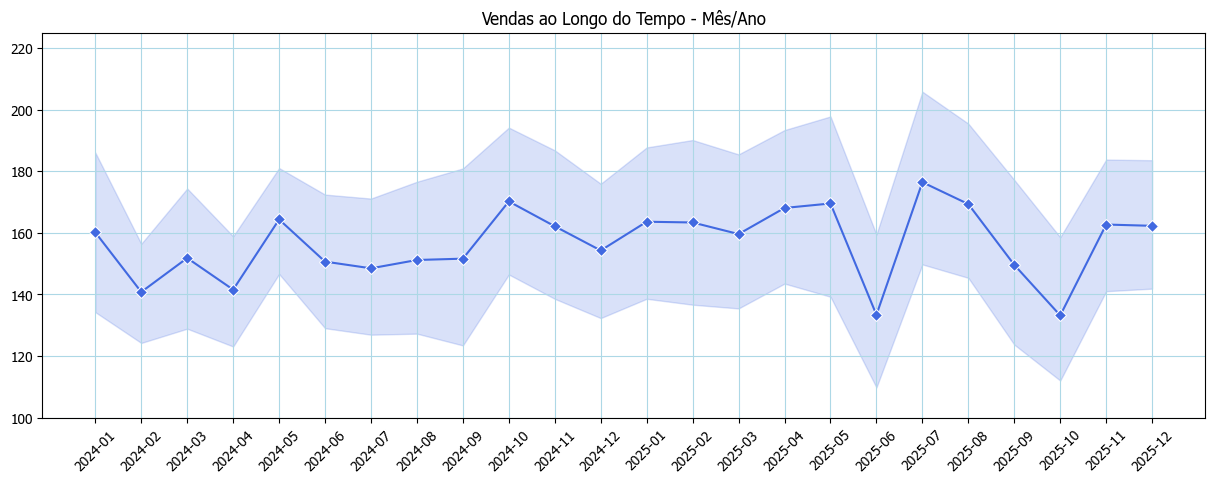

In [13]:
# Analisando Evolução das Vendas no Tempo

plt.rcParams['font.family'] = 'Tahoma'

dados = FactSales[['MesAnoVenda', 'Vendas']]

plt.figure(figsize=(15,5))
sns.lineplot(dados, x='MesAnoVenda', y='Vendas', marker='D', color='royalblue')

plt.title('Vendas ao Longo do Tempo - Mês/Ano')
plt.xlabel('')
plt.ylabel('')
plt.ylim((100,225))
plt.grid(which='major', color='lightblue')
plt.tick_params(axis='x', labelrotation=45)
plt.show()

In [14]:
 #Comparativo por Região
fig = px.box(
        data_frame=FactSales[['Vendas', 'Regiao']],
        x='Regiao',
        y='Vendas',
        color='Regiao',
        color_discrete_sequence=colors,
        title='Comparação de Total Faturado por Região'
        )

fig.update_yaxes(tickprefix="R$ ", showgrid=True)

fig.update_layout(title_x=0.5,
                font_family='Tahoma, monospace',
                title_font_color='midnightblue',
                font_color='black')
fig.show()


In [15]:
# Série de Vendas

fig = px.line(
        data_frame=FactSales[['Vendas', 'MesAnoVenda']],
        y='Vendas',
        title='Série Temporal - Vendas',
        color_discrete_sequence=colors
        )


fig.add_shape(
        type="rect",
        x0=410, x1=450,  # intervalo no eixo x
        y0=0, y1=1,  # cobre toda a altura do gráfico
        xref='x', yref='paper',  # 'paper' faz com que vá de 0 a 1 no eixo y
        fillcolor='powderblue',
        opacity=0.8,
        layer="below",
        line_width=1,
    )

fig.add_shape(
        type='rect',
        x0=8, x1=17,
        y0=0, y1=1,
        yref='paper',
        fillcolor="powderblue",
        opacity=0.8,
        line_width=1,
        layer='below'
    )

fig.add_shape(
        type='rect',
        x0=685, x1=695,
        y0=0, y1=1,
        yref='paper',
        fillcolor='powderblue',
        layer='below',
        opacity=0.8,
        line_width=1

)

fig.update_yaxes(tickprefix='R$ ')
fig.add_annotation(
                text='Maiores Valores de Venda',
                x=180,
                y=0.95,
                xref='x',
                yref='paper',
                showarrow=False)

fig.update_layout(title_x=0.5,
                font_family='Tahoma, monospace',
                title_font_color='midnightblue',
                font_color='black')

fig.show()

In [16]:
# Análise de Cedasticidade
# 'lowess', 'rolling', 'ewm', 'expanding', 'ols'

colors = px.colors.qualitative.Safe

fig = px.scatter(
            FactSales[['Clientes', 'Vendas', 'Regiao']],
            x='Clientes',
            y='Vendas',
            color='Regiao',
            color_discrete_sequence=colors,
            trendline='ols',
            animation_frame='Regiao',
            # marginal_x=px.box(FactSales['Regiao'])
)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5000

fig.update_layout(title_x=0.5,
                font_family='Tahoma, monospace',
                title_font_color='midnightblue',
                font_color='black')

fig.show()

In [ ]:
# Dispersão com Linha de Tendência Lowess

colors = px.colors.qualitative.Safe

fig = px.scatter(
            FactSales[['Clientes', 'Vendas', 'Regiao']],
            x='Clientes',
            y='Vendas',
            color='Regiao',
            color_discrete_sequence=colors,
            trendline='lowess',
            animation_frame='Regiao'
)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5000

fig.update_layout(title_x=0.5,
                font_family='Tahoma, monospace',
                title_font_color='midnightblue',
                font_color='black')

fig.show()

In [17]:
# Correlação entre variáveis
BaseAuxiliar = FactSales[['Vendas', 'Regiao', 'Clientes', 'DescontoPercent','CampanhaMarketing', 'PrecoMedio', 'IndiceSatisfacao']]
BaseAuxiliar = pd.get_dummies(BaseAuxiliar, dtype=int, drop_first=True)

BaseAuxiliar.corr()

,Vendas,Clientes,DescontoPercent,CampanhaMarketing,PrecoMedio,IndiceSatisfacao,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul
Vendas,1.000000,0.729536,-0.213872,0.104656,0.592785,-0.011278,-0.007910,0.023442,-0.056867,-0.007873
Clientes,0.729536,1.000000,0.030508,0.017694,-0.000937,0.028239,0.005422,0.043178,-0.058158,-0.036234
DescontoPercent,-0.213872,0.030508,1.000000,-0.008279,-0.016978,0.058259,0.001219,0.031233,0.000774,-0.051810
CampanhaMarketing,0.104656,0.017694,-0.008279,1.000000,-0.044454,0.012872,-0.004235,-0.015673,-0.017132,0.014180
PrecoMedio,0.592785,-0.000937,-0.016978,-0.044454,1.000000,-0.009760,-0.034988,0.016337,-0.035681,0.016673
IndiceSatisfacao,-0.011278,0.028239,0.058259,0.012872,-0.009760,1.000000,0.003191,-0.030917,-0.001733,0.023177
Regiao_Nordeste,-0.007910,0.005422,0.001219,-0.004235,-0.034988,0.003191,1.000000,-0.246718,-0.269680,-0.246718
Regiao_Norte,0.023442,0.043178,0.031233,-0.015673,0.016337,-0.030917,-0.246718,1.000000,-0.332674,-0.304348
Regiao_Sudeste,-0.056867,-0.058158,0.000774,-0.017132,-0.035681,-0.001733,-0.269680,-0.332674,1.000000,-0.332674
Regiao_Sul,-0.007873,-0.036234,-0.051810,0.014180,0.016673,0.023177,-0.246718,-0.304348,-0.332674,1.000000


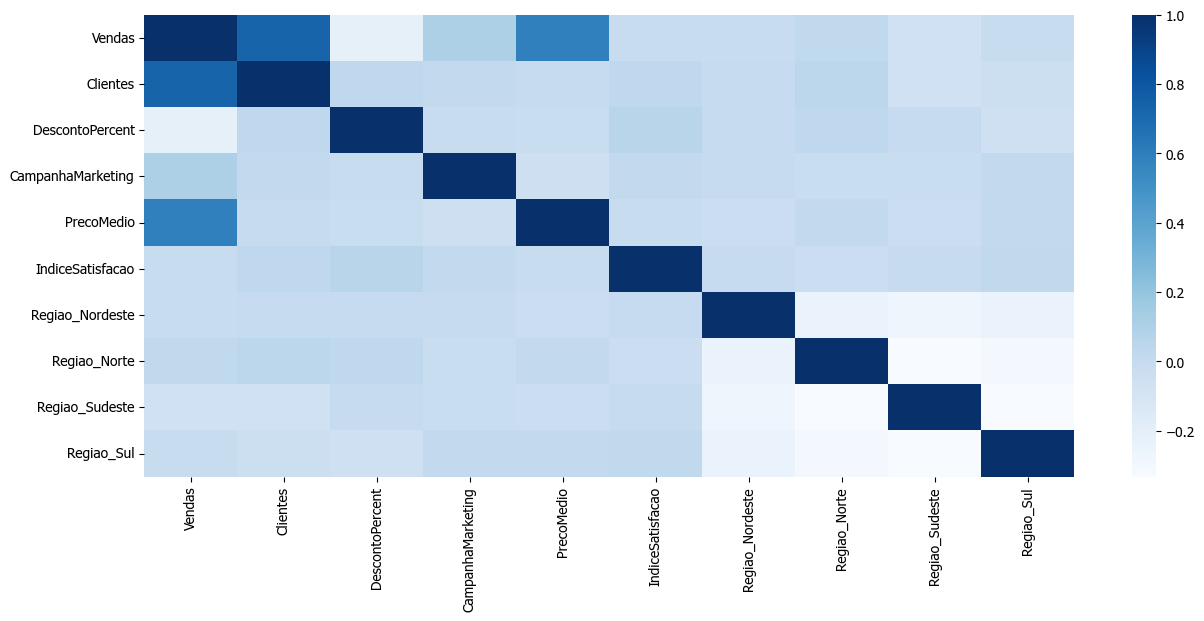

In [18]:
# Correlação com Heatmap
plt.figure(figsize=(15, 6))

sns.heatmap(BaseAuxiliar.corr(), cmap='Blues')

plt.show()

In [19]:
# OLS Regression Results
y = BaseAuxiliar['Vendas']

X = sm.add_constant(BaseAuxiliar.drop(columns='Vendas'))

modelo = sm.OLS(y, X)

resultado = modelo.fit()

resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Vendas   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1485.
Date:                Sun, 24 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:03:49   Log-Likelihood:                -2987.6
No. Observations:                 720   AIC:                             5995.
Df Residuals:                     710   BIC:                             6041.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -129.2326      5.149    -25.097      0.000    -139.342    -119.123
Clientes              0.1197      0.001     86.865      0.000       0.117       0.122
DescontoPercent      -1.7681      0.067    -26.489      0.000      -1.899      -1.637
CampanhaMarketing    18.1179      1.311     13.818      0.000      15.544      20.692
PrecoMedio            1.0485      0.015     70.418      0.000       1.019       1.078
IndiceSatisfacao     -0.8317      0.475     -1.752      0.080      -1.764       0.100
Regiao_Nordeste       2.8235      2.311      1.222      0.222      -1.713       7.360
Regiao_Norte          0.1320      2.180      0.061      0.952      -4.148       4.412
Regiao_Sudeste        2.3932      2.147      1.115      0.265      -1.823       6.609
Regiao_Sul            0.8317      2.186      0.381      0.704      -3.459       5.122
==============================================================================
Omnibus:                      137.075   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.421
Skew:                           0.813   Prob(JB):                    1.51e-126
Kurtosis:                       7.083   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Validando Multicolinearidade entre as Variáveis

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Variavel'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif)

,Variavel,VIF
0,const,79.994352
1,Clientes,1.011105
2,DescontoPercent,1.008074
3,CampanhaMarketing,1.004185
4,PrecoMedio,1.007212
5,IndiceSatisfacao,1.005831
6,Regiao_Nordeste,2.237495
7,Regiao_Norte,2.565392
8,Regiao_Sudeste,2.720292
9,Regiao_Sul,2.577867


In [21]:
# Comparação entre Valores Previstos e Resíduos

previstos = resultado.fittedvalues
residuos = resultado.resid

fig = px.scatter(x=previstos, 
                 y=residuos,
                 labels={'x':'Previstos', 'y':'Residuos'},
                 title='Resíduos vs Valores Previstos'
                 )

fig.add_hline(y=0, 
              line={'dash': 'dash',
               }
            )

fig.update_layout(title_x=0.5,
                font_family='Tahoma, monospace',
                title_font_color='midnightblue',
                font_color='black')

fig.show()

Conclusão:

- Quais variáveis são estatisticamente significantes?

As variáveis mais significantes são CampanhaMarketing com coeficiente 18.0425, DescontoPercent com coeficiente -1.7764, PrecoMedio com coeficiente 1.0469 e com o ajuste realizado nos modelos acima, o modelo 2 se configura como mais confiável, que apesar do mesmo R² de 0.949, desconsidera as variáveis irrelavantes.

- Como a empresa pode usar essas informações para aumentar suas vendas?

A empresa poderá direcionar seus esforços em mais campanhas de marketing, uma vez que tem um potencial maior na atração de clientes e efetivação de vendas, ainda, é possível dedicar tempo na elaboração de políticas melhores de desconto e até cross-selling, tendo em vista que os descontos oferecidos podem estar tempo um impacto negativo nas vendas.